In [20]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from twitenv import (CONSUMER_KEY, 
                    CONSUMER_SECRET, 
                    ACCESS_TOKEN, 
                    ACCESS_LEVEL)


# Twitter API Keys
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_LEVEL)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [23]:
# News Organizations
news_orgs = ["BBC", "CBS", "CNN", "FoxNews", "NYT" ]
news_orgs[1]

'CBS'

In [24]:
counter = 1

# Variables for holding sentiments
sentiments = []
oldest_tweet = None
# Loop through 5 pages of tweets (total 100 tweets)
for n in news_orgs:
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(n, 
                                          count=20,
                                             max_id=oldest_tweet)
        
public_tweets
    

BBC
CBS
CNN
FoxNews
NYT


[{'contributors': None,
  'coordinates': None,
  'created_at': 'Fri Mar 09 16:00:22 +0000 2018',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'nytimes.com/2018/03/09/fas…',
     'expanded_url': 'https://www.nytimes.com/2018/03/09/fashion/weddings/from-crayons-to-chemo-hes-back-by-her-side.html?partner=rss&emc=rss',
     'indices': [52, 75],
     'url': 'https://t.co/PRAQnvZLyc'}],
   'user_mentions': []},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 972140042184511490,
  'id_str': '972140042184511490',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'en',
  'place': None,
  'possibly_sensitive': False,
  'retweet_count': 0,
  'retweeted': False,
  'source': '<a href="http://radio3.io/" rel="nofollow">radio3.io</a>',
  'text': 'Vows: From Crayons to Chemo, He’s Back by Her S

In [12]:
# News Organizations
#news_orgs = ["BBC", "CBS", "CNN", "FoxNews", "NYT" ]
news_org = "NYT"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []
oldest_tweet = None
# Loop through news orgs
for n in len(news_orgs)
# Loop through 5 pages of tweets (total 100 tweets) per org
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(news_org[n], 
                                      count=20,
                                     max_id=oldest_tweet)

        # Loop through all tweets 
    for tweet in public_tweets:

       
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1
    oldest_tweet = int(tweet['id_str']) - 1

In [13]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.2023,Fri Mar 09 00:22:19 +0000 2018,0.795,0.000,0.205,1
1,0.0000,Fri Mar 09 00:17:19 +0000 2018,1.000,0.000,0.000,2
2,0.6369,Fri Mar 09 00:16:19 +0000 2018,0.756,0.000,0.244,3
3,-0.4404,Fri Mar 09 00:15:19 +0000 2018,0.775,0.225,0.000,4
4,0.0000,Fri Mar 09 00:13:19 +0000 2018,1.000,0.000,0.000,5


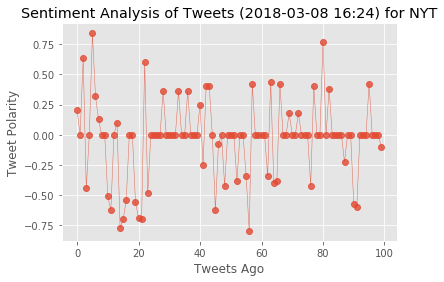

In [14]:
# Create plot
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now, news_org))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()